In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


In [2]:
# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Criar um DataFrame para visualização
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Criar o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# Importância das características
importance = rf.feature_importances_

# Criar um DataFrame para a importância
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


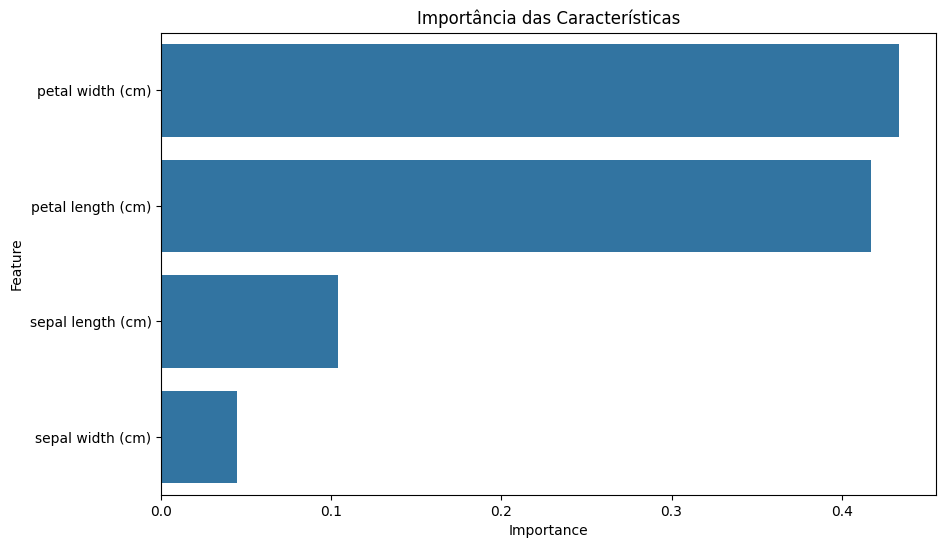

In [6]:
# Visualização da importância das características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Características')
plt.show()


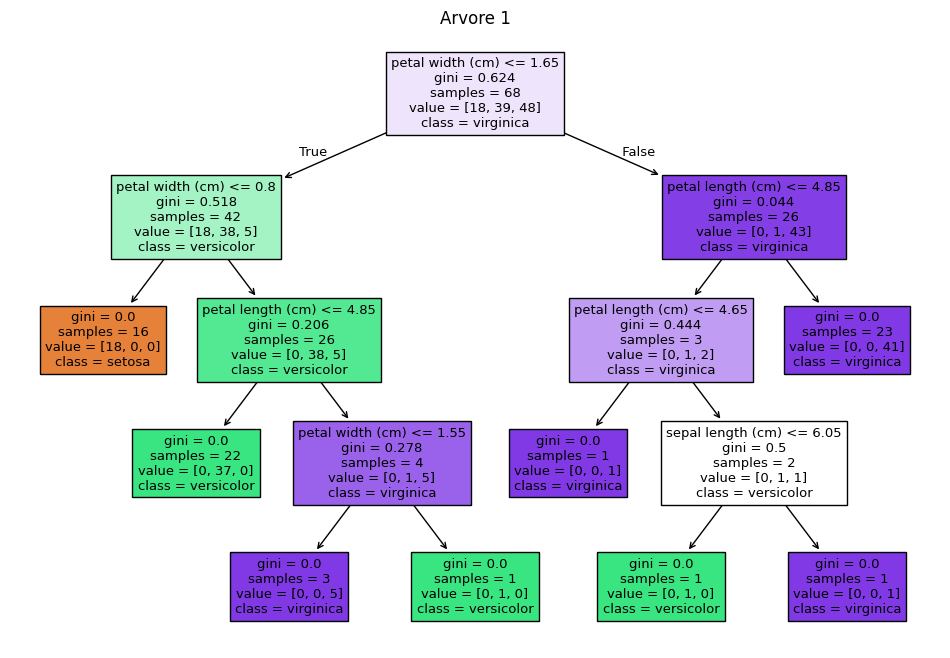

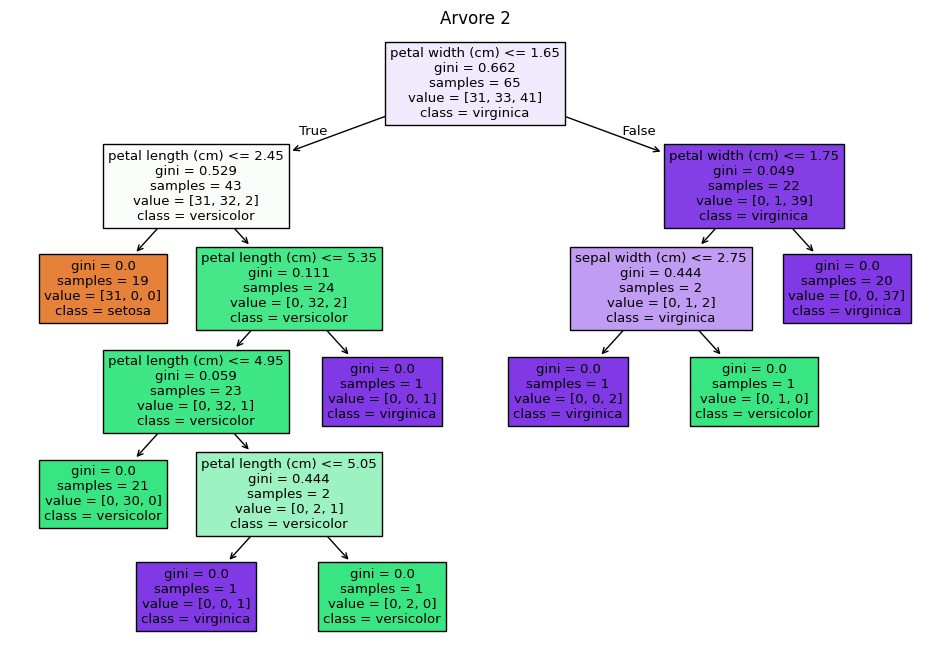

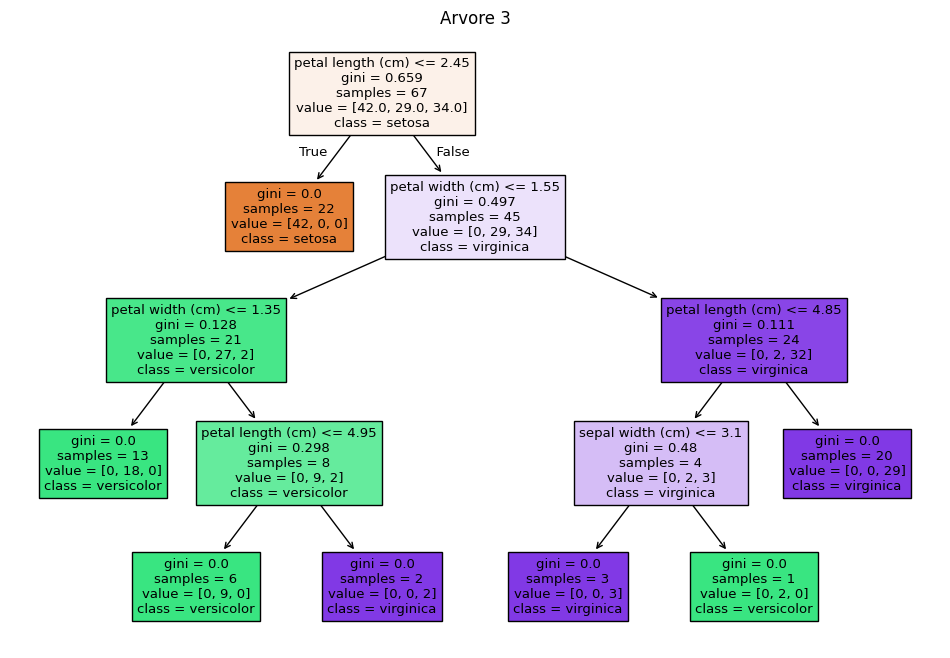

In [7]:
# Visualizar algumas árvores individuais
n_trees = 3  # Número de árvores que você deseja visualizar
for i in range(n_trees):
    plt.figure(figsize=(12, 8))
    tree.plot_tree(rf.estimators_[i], feature_names=feature_names, class_names=class_names, filled=True)
    plt.title(f'Arvore {i+1}')
    plt.show()
